Considerando a seguinte formulação:

<center>

$$Minimize f(\overset{\rightarrow}{x}),\overset{\rightarrow}{x} = [ {x_1},{x_2},{...},{x_n} ]$$

</center>

Subject to:

<center>

$$g_i(\overset{\rightarrow}{x}) \leq 0, i = 1,..., q$$

$$h_j(\overset{\rightarrow}{x}) = 0, j = q+1,..., m$$

</center>

Usually equality constraints are transformed into inequalities of the
form

<center>

$$\left| h_j(\overset{\rightarrow}{x}) \right| - \epsilon \leq 0, for j = q + 1,...,m $$

</center>

A solution $\overset{\rightarrow}{x}$ is regarded as *feasible* if
$g_i(\overset{\rightarrow}{x}) \leq 0$, for j = 1,…,q and
$\left| h_j(\overset{\rightarrow}{x}) \right| - \epsilon \leq 0, for$
$j = q + 1,...,m$. In this special session $\epsilon$ is set to 0.0001.

Implementar um algoritmo baseado em Computação Evolutiva (AG, ES, PE ou
PG) ou Evolução Diferencial (ED) ou Particle Swarm Optimization (PSO)
para resolver os seguintes problemas restritos de otimização:


### 1) Problema com 13 variáveis de decisão ($x_1$ até $x_{13}$ ) e 9 restrições de desigualdade.

g01

$Minimize [1]$:

<center>

$$ f(\overset{\rightarrow}{x}) = 5 \sum_{i=1}^4 x_i - 5 \sum_{i=1}^4 x²_i -  \sum_{i=5}^{13} x_i $$

</center>

subject to:

<center>

$$g_1(\overset{\rightarrow}{x})  =  2x_1 + 2x_2 + x_{10} + x_{11} - 10 \leq 0 $$

$$g_2(\overset{\rightarrow}{x}) = 2x_1 + 2x_3 + x_{10} + x_{12} - 10 \leq 0 $$

$$g_3(\overset{\rightarrow}{x}) = 2x_2 + 2x_3 + x_{11} + x_{12} - 10 \leq 0 $$

$$g_4(\overset{\rightarrow}{x}) = -8x_1 + x_{10} \leq 0 $$

$$g_5(\overset{\rightarrow}{x}) = -8x_2 + x_{11} \leq 0 $$

$$g_6(\overset{\rightarrow}{x}) = -8x_3 + x_{12} \leq 0 $$

$$g_7(\overset{\rightarrow}{x}) = -2x_4 - x_5 + x_{10} \leq 0 $$

$$g_8(\overset{\rightarrow}{x}) = -2x_6 - x_7 + x_{11} \leq 0 $$

$$g_9(\overset{\rightarrow}{x}) = -2x_8 - x_9 + x_{12} \leq 0 $$

</center>

com

<center>

$$0 \leq x \leq 1 (i = 1,...,9), 0 \leq  x_i \leq 100  (i = 10, 11, 12) and 0 \leq  x_{13} \leq 1$$

</center>

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size, max_generations, mutation_rate, crossover_rate, n_variables, n_inequality_constraints, epsilon, penalty_method):
        self.pop_size = pop_size
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.n_variables = n_variables
        self.n_inequality_constraints = n_inequality_constraints
        self.epsilon = epsilon
        self.penalty_method = penalty_method

        self.lower_bound = [0] * 9 + [0, 0, 0] + [0, 0, 0, 0, 0, 0, 0]
        self.upper_bound = [1] * 9 + [100, 100, 100] + [1]

    def objective_function(self, x):
        return 5 * sum(x[:4]) - 5 * sum([xi**2 for xi in x[:4]]) - sum(x[4:13])

    def inequality_constraints(self, x):
        constraints = np.zeros(self.n_inequality_constraints)
        
        constraints[0] = 2*x[0] + 2*x[1] + x[9] + x[10] - 10
        constraints[1] = 2*x[0] + 2*x[2] + x[9] + x[11] - 10
        constraints[2] = 2*x[1] + 2*x[2] + x[10] + x[11] - 10
        constraints[3] = -8*x[0] + x[9]
        constraints[4] = -8*x[1] + x[10]
        constraints[5] = -8*x[2] + x[11]
        constraints[6] = -2*x[3] - x[4] + x[9]
        constraints[7] = -2*x[5] - x[6] + x[10]
        constraints[8] = -2*x[7] - x[8] + x[11]

        return constraints

    def penalty_function(self, x):
        constraints = self.inequality_constraints(x)
        penalty = sum([max(0, constraint)**2 for constraint in constraints])
        return penalty
    
    def penalty_function_epsilon(self, x):
        constraints = self.inequality_constraints(x)
        penalty = sum([max(0, constraint)**2 if constraint <= 0 else (constraint / self.epsilon)**2 for constraint in constraints])
        return penalty

    def is_feasible(self, x):
        constraints = self.inequality_constraints(x)
        return all([constraint <= 0 for constraint in constraints]) and all([abs(constraint) - self.epsilon <= 0 for constraint in constraints[self.n_inequality_constraints:]])

    def initialize_population(self):
        population = []
        for _ in range(self.pop_size):
            individual = [random.uniform(self.lower_bound[i], self.upper_bound[i]) for i in range(self.n_variables)]
            population.append(individual)
        return population

    def select_parents(self, population):
        parents = []
        for _ in range(self.pop_size):
            tournament = random.sample(range(self.pop_size), 2)
            if self.penalty_method == "static":
                fitness1 = self.penalty_function(population[tournament[0]])
                fitness2 = self.penalty_function(population[tournament[1]])
            else:
                fitness1 = self.penalty_function_epsilon(population[tournament[0]])
                fitness2 = self.penalty_function_epsilon(population[tournament[1]])
            if fitness1 <= fitness2:
                parents.append(population[tournament[0]])
            else:
                parents.append(population[tournament[1]])
        return parents

    def crossover(self, parent1, parent2):
        point = random.randint(1, self.n_variables - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2

    def mutate(self, individual):
        for i in range(self.n_variables):
            if random.random() < self.mutation_rate:
                individual[i] = random.uniform(self.lower_bound[i], self.upper_bound[i])
        return individual

    def evaluate_population(self, population):
        fitness_values = []
        for individual in population:
            if self.is_feasible(individual):
                fitness_values.append(self.objective_function(individual))
            else:
                fitness_values.append(float('inf'))
        return fitness_values

    def genetic_algorithm(self):
        population = self.initialize_population()

        fitness_values = self.evaluate_population(population)

        best_fitness = min(fitness_values)
        best_solution = population[fitness_values.index(best_fitness)]

        for _ in range(self.max_generations):
            parents = self.select_parents(population)

            offspring = []
            while len(offspring) < self.pop_size:
                parent1, parent2 = random.sample(parents, 2)
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                offspring.append(child1)
                offspring.append(child2)

            offspring_fitness = self.evaluate_population(offspring)

            population = offspring
            fitness_values = offspring_fitness

            best_fitness = min(fitness_values)
            best_solution = population[fitness_values.index(best_fitness)]

            if best_fitness < float('inf'):
                break

        return best_solution, best_fitness

Resultados:

Configuração A:
Minimum: -7.952218877300561
Maximum: -1.7583495172599335
Mean: -4.562124064237985
Standard Deviation: 1.5131511724726956

Configuração B:
Minimum: -8.93278635150279
Maximum: 0.08251262155192363
Mean: -3.9840427091226025
Standard Deviation: 2.0760443101315595


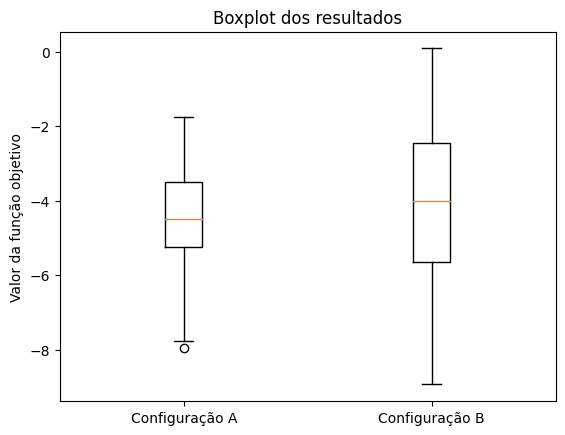

In [4]:
# Configurações do algoritmo genético
configurations = [
    {"name": "Configuração A", "penalty_method": "static"},
    {"name": "Configuração B", "penalty_method": "epsilon"}
]

# Dicionário para armazenar os resultados
results = {
    "Configuração A": {"fitness_values": [], "solutions": []},
    "Configuração B": {"fitness_values": [], "solutions": []}
}

# Executar o algoritmo 30 vezes para cada configuração
for config in configurations:
    for _ in range(30):
        # Criar uma instância do algoritmo genético com a configuração atual
        ga = GeneticAlgorithm(
            pop_size=100,
            max_generations=100,
            mutation_rate=0.1,
            crossover_rate=0.8,
            n_variables=13,
            n_inequality_constraints=9,
            epsilon=0.0001,
            penalty_method=config["penalty_method"]
        )

        # Executar o algoritmo genético
        best_solution, best_fitness = ga.genetic_algorithm()

        # Armazenar os resultados
        results[config["name"]]["fitness_values"].append(best_fitness)
        results[config["name"]]["solutions"].append(best_solution)

# Calcular estatísticas
statistics = {}
for config_name, result in results.items():
    fitness_values = result["fitness_values"]
    statistics[config_name] = {
        "Minimum": np.min(fitness_values),
        "Maximum": np.max(fitness_values),
        "Mean": np.mean(fitness_values),
        "Standard Deviation": np.std(fitness_values)
    }

# Imprimir resultados
print("Resultados:")
for config_name, stats in statistics.items():
    print(f"\n{config_name}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")

plt.boxplot([results["Configuração A"]["fitness_values"], results["Configuração B"]["fitness_values"]])
plt.xticks([1, 2], ["Configuração A", "Configuração B"])
plt.ylabel("Valor da função objetivo")
plt.title("Boxplot dos resultados")
plt.show()


### 2) Problema com 2 variáveis de decisão ($x_1$ até $x_2$ ) e 5 restrições (2 de desigualdade e 3 de igualdade).

g05

$Minimize [3]$:

<center>

$$f(\overset{\rightarrow}{x}) =  3x_1 + 0.000001x³_1 + 2x_2 + (0.000002/3)x³_2 $$

</center>

subject to:

<center>

$$g_1(\overset{\rightarrow}{x})  =  -x_4 + x_3 - 0.55 \leq 0 $$

$$g_2(\overset{\rightarrow}{x}) = -x_3 + x_4 - 0.55 \leq 0 $$

$$h_3(\overset{\rightarrow}{x}) = 1000sin(-x_3 - 0.25) + 1000sin(-x_4 - 0.25) + 894.8 -x_1   = 0 $$

$$h_4(\overset{\rightarrow}{x}) = 1000sin(x_3 - 0.25) + 1000sin(x_3 - x_4 - 0.25) + 894.8 -x_2   = 0 $$

$$h_5(\overset{\rightarrow}{x}) = 1000sin(x_4 - 0.25) + 1000sin(x_4 - x_3 - 0.25) + 1294.8   = 0 $$

</center>

com

<center>

$$0 \leq x_1 \leq 1200, 0 \leq x_2 \leq 1200, -0.55 \leq x_3 \leq 0.55 and -0.55 \leq x_4 \leq 0.55$$

</center>


In [ ]:
print("")

### Tratamento de Restrições

Terá que ser implementado duas formas de tratamento de restrições, sendo
elas:

-   Penalidade Estática.
-   ɛ-constrained method

### A fazer

Execute o algoritmo genético proposto 30 vezes de modo independente para
cada função objetivo utilizando a Configuração A (Penalidade Estática) e
uma configuração B (tratamento sorteado). E baseado no valor final da
função objetivo retornado em cada uma das 30 execuções faça uma tabela
que mostre: média, valor mínimo, valor máximo e desvio padrão do valor
da função objetivo retornada pelo algoritmo. Mostre também o resultado
graficamente com boxplot. Faça um relatório que explique como os
algoritmos foram implementados (pode ser feito em qualquer linguagem de
programação), quais foram as configurações utilizadas para os parâmetros
da meta-heurística escolhida e como foi feito o tratamento das
restrições em cada problema. Envie também o código fonte. Para a melhor
solução encontrada para cada problema com cada configuração especifique
os valores das variáveis de decisão. Apresente as seguintes tabelas e
discuta os resultados obtidos.